# Thompson Sampling

In [4]:
import pandas as pd
data = pd.read_csv('Ads_Optimisation.csv')

In [5]:
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [6]:
ads=10 #no of advertisement
selected_adv=[]
observations=10000
rewards=[0]*ads
penalties=[0]*ads
total_reward=0

In [7]:
import random
for n in range(0,observations):
    bandit=0
    beta_dist_max=0
    for i in range(0, ads):
        beta_d=random.betavariate(rewards[i]+1,penalties[i]+1)  #will calculate beta variate in bernauli beta distributon(caluculate beta dist. for penalty and reward for each ad)
        if beta_d > beta_dist_max:
            beta_dist_max = beta_d
            bandit=i    #this means the person is clicking that add
    selected_adv.append(bandit)
    reward = data.values[n, bandit]
    if reward == 1:
        rewards[bandit]=rewards[bandit]+1
    else:
        penalties[bandit]=penalties[bandit]+1
    total_reward=total_reward+reward


In [8]:
rewards

[22, 4, 9, 10, 2435, 1, 3, 82, 5, 2]

Text(0, 0.5, 'Rewards')

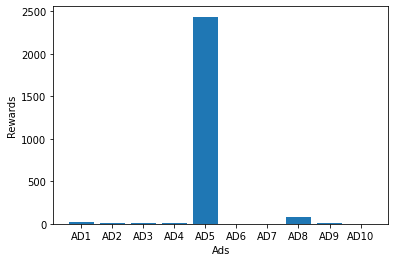

In [9]:
import matplotlib.pyplot as plt
plt.bar(['AD1','AD2','AD3','AD4','AD5','AD6','AD7','AD8','AD9','AD10'],rewards)
plt.xlabel('Ads')
plt.ylabel('Rewards')